<a href="https://colab.research.google.com/github/TVMSairam123/Day10_DS_ML/blob/main/Day10_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Import the dataset

dataset = pd.read_csv("/content/Social_Network_Ads.csv")

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
#Splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [ ]:
#Perform feature scaling using standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [7]:
#Need to import the random forest algorithm from ensemble

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')

rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
#Testing with test set results

y_pred = rfc.predict(x_test)

In [9]:
#Check with new data point

print(rfc.predict(sc.transform([[30, 87000]])))

[0]


In [10]:
print(rfc.predict(sc.transform([[19, 50000]])))

[0]


In [11]:
#Get the ground truth based on the confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_pred, y_test)
print(cm)

accuracy_score(y_pred, y_test)

[[45  5]
 [ 4 26]]


0.8875

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


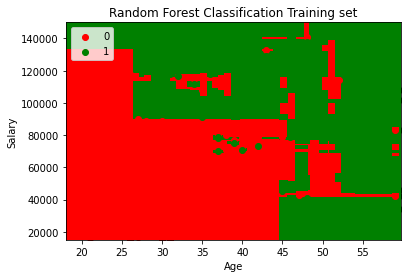

In [12]:
#Visualize the training set data

from matplotlib.colors import ListedColormap

x_set, y_set = sc.inverse_transform(x_train), y_train

x1,x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 0, stop = x_set[:, 0].max() + 0, step = 0.25),
                    np.arange(start = x_set[:, 1].min() - 0, stop = x_set[:, 1].max() + 1, step = 0.25))

plt.contourf(x1, x2, rfc.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             cmap = ListedColormap(("red", "green")))

#To solve the outlier we need to mention the limitations

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(("red", "green"))(i), label = j)

plt.title("Random Forest Classification Training set")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


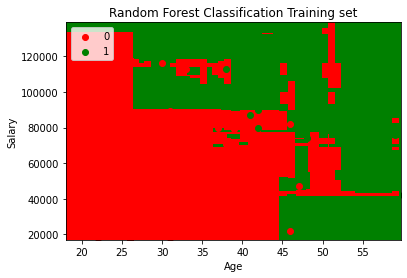

In [13]:
#Visualize the test set data

from matplotlib.colors import ListedColormap

x_set, y_set = sc.inverse_transform(x_test), y_test

x1,x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 0, stop = x_set[:, 0].max() + 0, step = 0.25),
                    np.arange(start = x_set[:, 1].min() - 0, stop = x_set[:, 1].max() + 1, step = 0.25))

plt.contourf(x1, x2, rfc.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             cmap = ListedColormap(("red", "green")))

#To solve the outlier we need to mention the limitations

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(("red", "green"))(i), label = j)

plt.title("Random Forest Classification Training set")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()
plt.show()